In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [3]:
data = pd.read_csv('wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## EDA

In [4]:
# Drop the unwanted column from the data
data1 = data.drop("Type" , axis=1)
data1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Information about the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## PCA on dataset and reduce it's Dimention to 3

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [7]:
data_pca = data.iloc[:,1:].values
# data_pca

In [8]:
# Standerdize the dataset
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_data = scale.fit_transform(data_pca)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
# PCA
pca = PCA(n_components = 3, random_state = 1)
pca_data  = pca.fit_transform(scaled_data)

In [10]:
scaled_pca_data = scale.fit_transform(pca_data)

In [11]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_


# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53])

## K-Means & Hierarchical Clustering

### K-Means

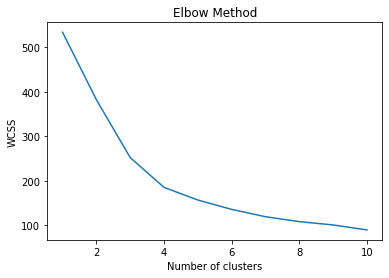

In [12]:
from sklearn.cluster import KMeans

#Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=4)
    kmeans.fit(scaled_pca_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++' , random_state=0)
label_km_pca = kmeans.fit_predict(scaled_pca_data)
label_km_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [14]:
pca = PCA(2)
 
#Transform the data
pca_data = pca.fit_transform(scaled_pca_data)
pca_df = pd.DataFrame(pca_data, columns = ['p1','p2'])
pca_df.head()

,p1,p2
0,-0.297534,-0.874593
1,1.593537,-0.587314
2,-1.025798,-0.203797
3,-0.671767,-1.616451
4,-1.749768,0.285921


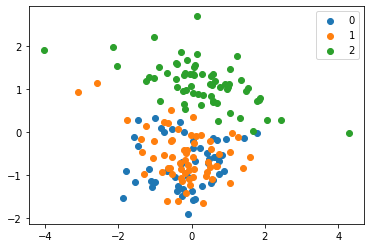

In [15]:
#Getting unique label_hcs
 
u_labels = np.unique(label_km_pca)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_data[label_km_pca == i , 0] , pca_data[label_km_pca == i , 1] , label = i)
plt.legend()
plt.show()

In [16]:
data['KM_PCA_labels'] = label_km_pca
# data.head()

### Hierarchical Clustering

In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

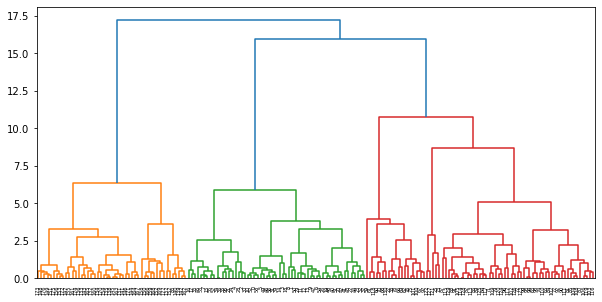

In [18]:
# Dendrogram
plt.figure(figsize = (10,5))
dendrogram = sch.dendrogram(sch.linkage(scaled_pca_data , method='ward') , color_threshold=12.5 )

In [19]:
# Create Clusters
hc = AgglomerativeClustering(n_clusters = 3 , affinity = 'euclidean' , linkage = 'ward')

In [20]:
label_hc_pca = hc.fit_predict(scaled_data)
label_hc_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

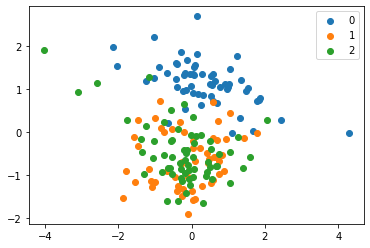

In [21]:
#Getting unique label_hcs
 
u_labels = np.unique(label_hc_pca)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_data[label_hc_pca == i , 0] , pca_data[label_hc_pca == i , 1] , label = i)
plt.legend()
plt.show()

In [22]:
data['HC_PCA_labels'] = label_hc_pca
# data.head()

In [23]:
data.groupby('Type').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KM_PCA_labels,HC_PCA_labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,1.00000,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.84507,0.253521
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.00000,1.000000


In [24]:
data.groupby('KM_PCA_labels').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,HC_PCA_labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
KM_PCA_labels,,,,,,,,,,,,,,,
0,2.923077,13.138077,3.261731,2.416538,21.159615,98.884615,1.700192,0.828077,0.453846,1.131923,7.156538,0.698269,1.701154,621.576923,1.000000
1,1.048387,13.689194,1.980806,2.445645,17.241935,108.241935,2.826935,2.951129,0.290161,1.936452,5.411613,1.067581,3.141129,1104.822581,1.935484
2,2.000000,12.221875,1.928906,2.249219,20.325000,92.203125,2.263281,2.112188,0.356563,1.629063,3.010625,1.061344,2.838594,501.968750,0.187500


In [25]:
data.groupby('HC_PCA_labels').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KM_PCA_labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
HC_PCA_labels,,,,,,,,,,,,,,,
0,2.000000,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034,1.965517
1,2.857143,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429,0.142857
2,1.078125,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875,1.062500


In [26]:
data['KM_label'] = data['KM_PCA_labels'].map({0 : 3 , 1 : 1 , 2 : 2})
data['HC_label'] = data['HC_PCA_labels'].map({0 : 2 , 1 : 3 , 2 : 1})
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KM_PCA_labels,HC_PCA_labels,KM_label,HC_label
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2,1,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2,1,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2,1,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2,1,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2,1,1


In [27]:
from sklearn.metrics import confusion_matrix ,accuracy_score

confusion_matrix(data['Type'].values , data['KM_label'].values)

array([[59,  0,  0],
       [ 3, 64,  4],
       [ 0,  0, 48]], dtype=int64)

In [28]:
accuracy_score(data['Type'].values , data['KM_label'].values)

0.9606741573033708

In [29]:
confusion_matrix(data['Type'].values , data['HC_label'].values)

array([[59,  0,  0],
       [ 5, 58,  8],
       [ 0,  0, 48]], dtype=int64)

In [30]:
accuracy_score(data['Type'].values , data['HC_label'].values)

0.9269662921348315

## Conclusion

+ As we can see that the accuracy of KMeans Cluster using PCA is around 96%
+ And the accuracy of Hierarchical Clustering using PCA is around 92%